In [3]:
import pandas as pd


gold_data=pd.read_csv("/content/total_gold data1.csv")

# Display the first few rows and data structure
print(gold_data.info())
print(gold_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                9846 non-null   object 
 1   Open                9846 non-null   float64
 2   High                9846 non-null   float64
 3   Low                 9846 non-null   float64
 4   Close               9846 non-null   float64
 5   Adj Close           9846 non-null   float64
 6   Volume              9846 non-null   int64  
 7   News                9846 non-null   object 
 8   Asset Comparision   9846 non-null   int64  
 9   Past Information    9846 non-null   int64  
 10  Future Information  9846 non-null   int64  
 11  Price Sentiment     9846 non-null   object 
 12  Price Direction     9846 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 1000.1+ KB
None
         Date        Open        High         Low       Close   Adj Close  \
0  2000-09-

In [4]:
# Convert 'Date' column to datetime and set it as the index
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

# Check for any duplicates in the dates
duplicate_dates = gold_data.index[gold_data.index.duplicated()]
print(f"Number of duplicate dates: {len(duplicate_dates)}")

# Optional: Print the duplicate entries to inspect them
print(gold_data[gold_data.index.isin(duplicate_dates)])


Number of duplicate dates: 6568
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-10-17   282.200012   283.399994   282.200012   283.399994   283.399994   
2001-10-17   282.200012   283.399994   282.200012   283.399994   283.399994   
2002-05-09   307.500000   309.500000   307.500000   309.500000   309.500000   
2002-05-09   307.500000   309.500000   307.500000   309.500000   309.500000   
2002-05-10   311.000000   311.000000   311.000000   311.000000   311.000000   
...                 ...          ...          ...          ...          ...   
2019-01-04  1294.199951  1294.199951  1275.300049  1282.699951  1282.699951   
2019-01-09  1279.400024  1289.300049  1279.199951  1289.300049  1289.300049   
2019-01-09  1279.400024  1289.300049  1279.199951  1289.300049  1289.300049   
2019-01-31  1320.000000  1325.400024  1316.699951  1319.699951  1319.699951   
2019-01-31  1320.000

In [5]:
# Remove duplicate dates, keeping only the first occurrence of each
gold_data_cleaned = gold_data[~gold_data.index.duplicated(keep='first')]

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(gold_data_cleaned)}")


Number of rows after removing duplicates: 3278


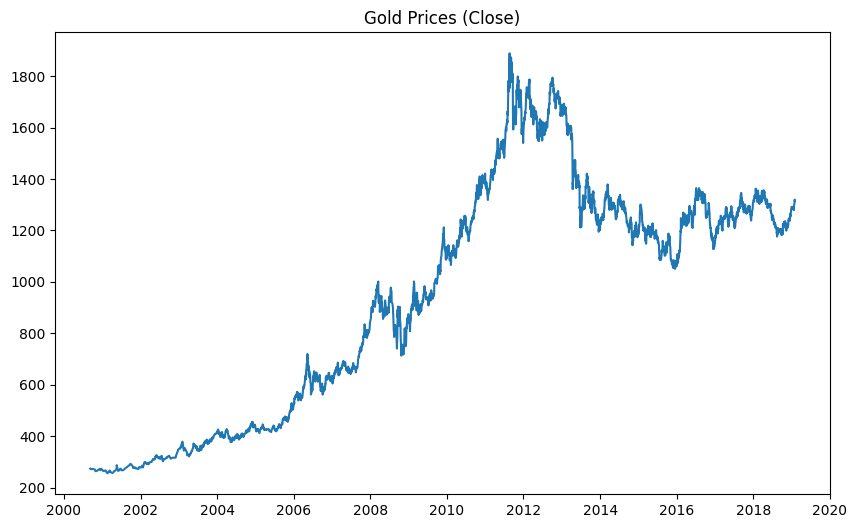

ADF Statistic: -1.8375077748355195
p-value: 0.36200545419422625


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the 'Close' price to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'])
plt.title('Gold Prices (Close)')
plt.show()

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(gold_data_cleaned['Close'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Interpretation: If p-value > 0.05, the series is not stationary and differencing will be needed


<ipython-input-7-c7429508c811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_cleaned['Close_diff'] = gold_data_cleaned['Close'].diff().dropna()


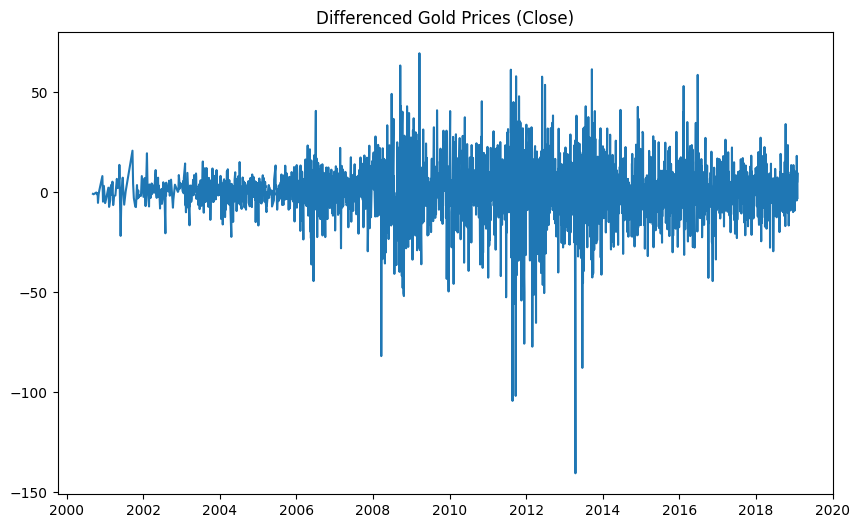

ADF Statistic (Differenced): -57.50608595235856
p-value (Differenced): 0.0


In [7]:
# Apply first differencing to make the series stationary
gold_data_cleaned['Close_diff'] = gold_data_cleaned['Close'].diff().dropna()

# Plot the differenced 'Close' price
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close_diff'])
plt.title('Differenced Gold Prices (Close)')
plt.show()

# Perform the ADF test on the differenced data
adf_test_diff = adfuller(gold_data_cleaned['Close_diff'].dropna())
print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
print(f"p-value (Differenced): {adf_test_diff[1]}")

# Interpretation: If p-value < 0.05, the differenced series is stationary


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model (p, d, q)
p, d, q = 1, 1, 1  # Try (1, 1, 1) initially, you can tune these later

# Fit the ARIMA model on the original (non-differenced) 'Close' price
model = ARIMA(gold_data_cleaned['Close'], order=(p, d, q))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3278
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13256.463
Date:                Tue, 22 Oct 2024   AIC                          26518.926
Time:                        10:18:58   BIC                          26537.210
Sample:                             0   HQIC                         26525.473
                               - 3278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9368      0.046     20.387      0.000       0.847       1.027
ma.L1         -0.9465      0.042    -22.300      0.000      -1.030      -0.863
sigma2       191.1007      2.095     91.199      0.0

In [9]:
# Forecast future values (e.g., next 10 periods)
forecast = model_fit.forecast(steps=10)

# Print the forecasted values
print("Forecasted values for the next 10 periods:")
print(forecast)

Forecasted values for the next 10 periods:
3278    1316.419564
3279    1315.969450
3280    1315.547765
3281    1315.152716
3282    1314.782618
3283    1314.435896
3284    1314.111074
3285    1313.806768
3286    1313.521683
3287    1313.254604
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<ipython-input-10-4cf9957d1bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_cleaned['Forecast'] = model_fit.predict(start=0, end=len(gold_data_cleaned)-1)


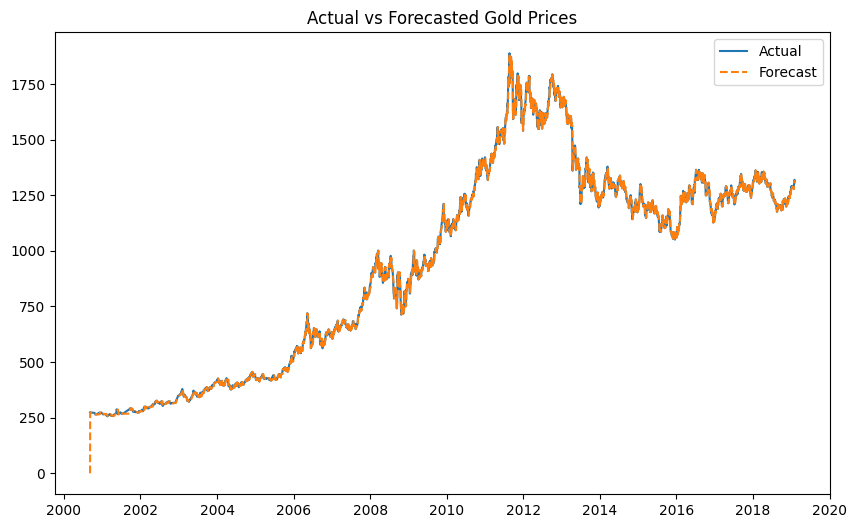

In [10]:
# Plot the actual vs forecasted values (for training period)
gold_data_cleaned['Forecast'] = model_fit.predict(start=0, end=len(gold_data_cleaned)-1)

plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'], label='Actual')
plt.plot(gold_data_cleaned['Forecast'], label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Gold Prices')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 213.93190397444275


In [12]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Absolute Error: {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # You already have MSE calculated
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 9.299426055567112
Root Mean Squared Error: 14.626411178906558


In [13]:
import itertools
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for simplicity

# Define the p, d, q ranges
p = range(0, 3)  # Testing values from 0 to 2 for 'p'
d = range(0, 2)  # Testing values from 0 to 1 for 'd'
q = range(0, 3)  # Testing values from 0 to 2 for 'q'

# Create a list of all possible combinations of p, d, q values
pdq = list(itertools.product(p, d, q))

# Loop through all the combinations, fitting a model each time
best_aic = float('inf')
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(gold_data_cleaned['Close'], order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

# Display the best model's parameters and AIC score
print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC:{best_aic}')


Best ARIMA Model: ARIMA(0, 1, 0) - AIC:26517.396339539773


Best ARIMA Model: ARIMA(0, 1, 0) - AIC: 26517.396339539773


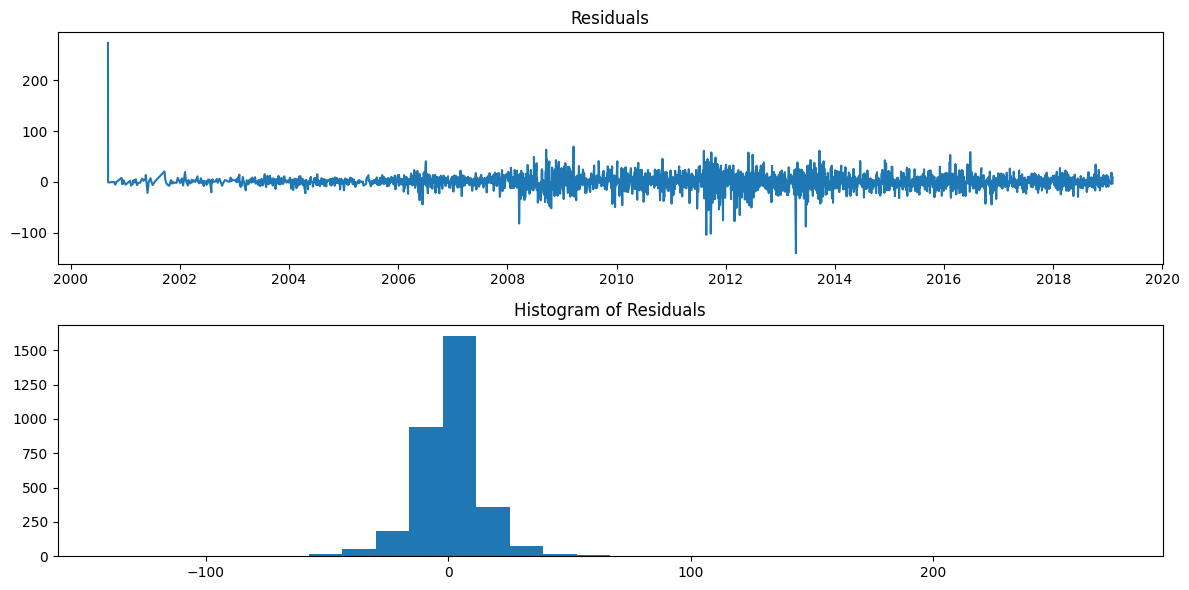

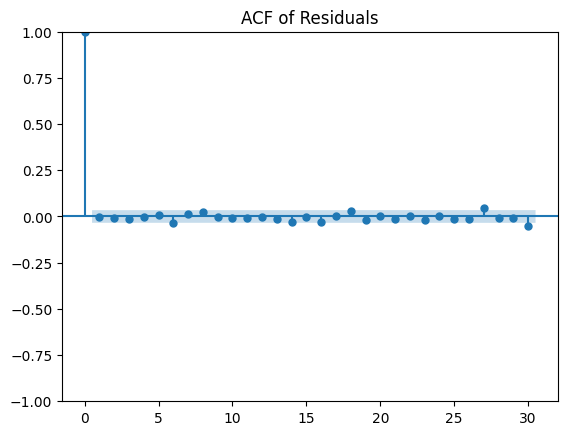

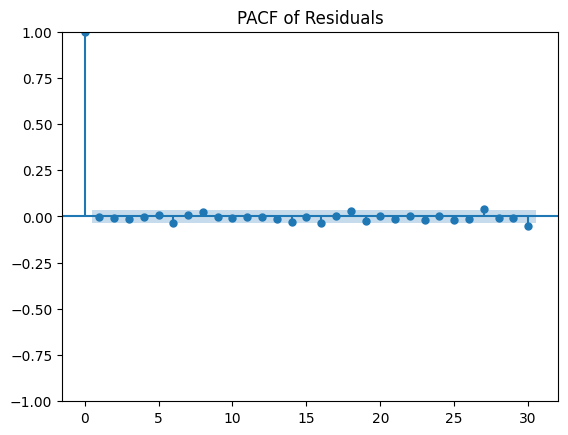

     lb_stat  lb_pvalue
10  7.797482   0.648611


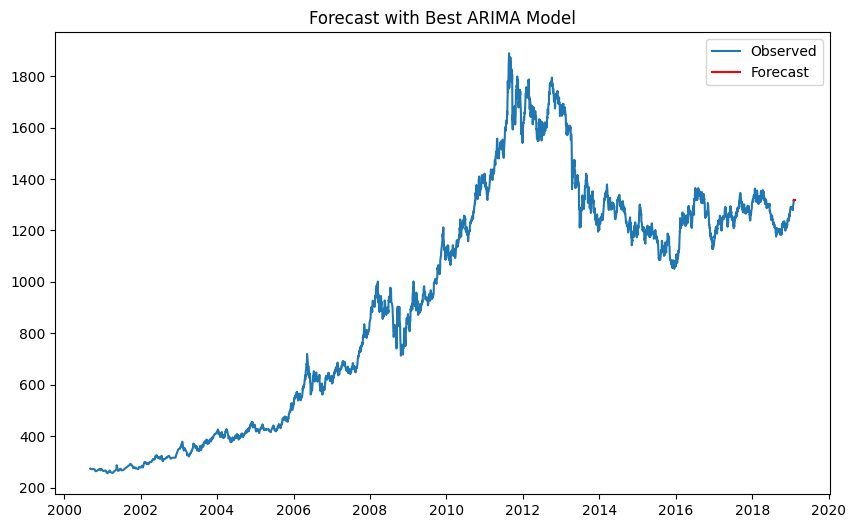

In [14]:
import itertools
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ignore warnings for simplicity
warnings.filterwarnings('ignore')

# Load your data (assuming gold_data_cleaned is a DataFrame with a 'Close' column)
# Example: gold_data_cleaned = pd.read_csv('your_data.csv')

# Define the p, d, q ranges
p = range(0, 3)  # You can expand this range if needed
d = range(0, 2)
q = range(0, 3)

# Create a list of all possible combinations of p, d, q values
pdq = list(itertools.product(p, d, q))

# Loop through all combinations and fit models
best_aic = float('inf')
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(gold_data_cleaned['Close'], order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

# Display the best model's parameters and AIC score
print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC: {best_aic}')

# Refitting the best model
best_model_refit = ARIMA(gold_data_cleaned['Close'], order=best_pdq).fit()

# Check residuals
residuals = best_model_refit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

# ACF and PACF plots for residuals
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

plot_pacf(residuals, lags=30)
plt.title('PACF of Residuals')
plt.show()

# Ljung-Box test for autocorrelation in residuals
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

# Forecasting with the best model
forecast = best_model_refit.get_forecast(steps=10)
forecast_index = pd.date_range(start=gold_data_cleaned.index[-1], periods=10, freq='D')  # Adjust frequency as needed
forecast_values = forecast.predicted_mean
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Forecast with Best ARIMA Model')
plt.legend()
plt.show()


In [15]:
# Refit the best model
best_model = ARIMA(gold_data_cleaned['Close'], order=(0, 1, 0))
best_model_fit = best_model.fit()

# Forecast the values using the new model
gold_data_cleaned['Forecast'] = best_model_fit.predict(start=0, end=len(gold_data_cleaned)-1)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Squared Error (MSE)
mse_best = mean_squared_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Squared Error (Best Model): {mse_best}')

# Mean Absolute Error (MAE)
mae_best = mean_absolute_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Absolute Error (Best Model): {mae_best}')

# Root Mean Squared Error (RMSE)
rmse_best = np.sqrt(mse_best)
print(f'Root Mean Squared Error (Best Model): {rmse_best}')


Mean Squared Error (Best Model): 214.0763683797237
Mean Absolute Error (Best Model): 9.295576504049249
Root Mean Squared Error (Best Model): 14.631348822980186


3278    1316.900024
3279    1316.900024
3280    1316.900024
3281    1316.900024
3282    1316.900024
3283    1316.900024
3284    1316.900024
3285    1316.900024
3286    1316.900024
3287    1316.900024
3288    1316.900024
3289    1316.900024
3290    1316.900024
3291    1316.900024
3292    1316.900024
3293    1316.900024
3294    1316.900024
3295    1316.900024
3296    1316.900024
3297    1316.900024
3298    1316.900024
3299    1316.900024
3300    1316.900024
3301    1316.900024
3302    1316.900024
3303    1316.900024
3304    1316.900024
3305    1316.900024
3306    1316.900024
3307    1316.900024
Name: predicted_mean, dtype: float64


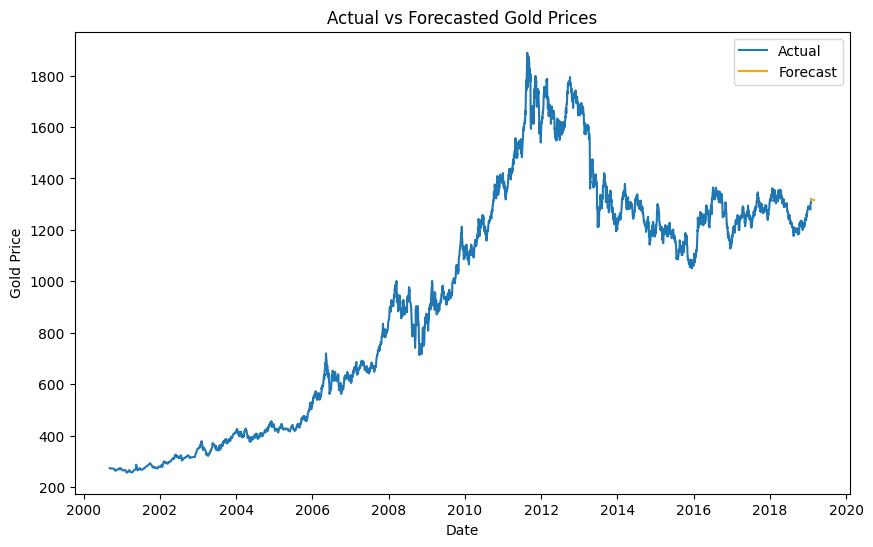

In [16]:
# Forecasting the next 30 days
forecast_steps = 30  # You can adjust this number based on how many future periods you'd like to forecast
forecast = best_model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)

# Plot the forecasted future values along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned.index, gold_data_cleaned['Close'], label='Actual')
plt.plot(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
         forecast, label='Forecast', color='orange')
plt.legend()
plt.title('Actual vs Forecasted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()


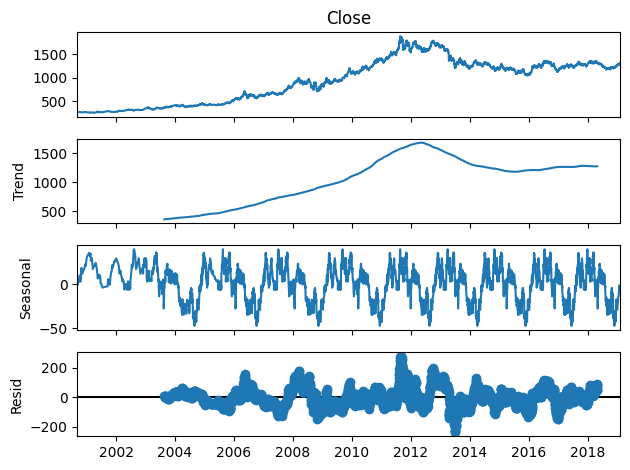

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (using 'Close' column)
result = seasonal_decompose(gold_data_cleaned['Close'], model='additive', period=365)

# Plot the decomposed components (trend, seasonality, and residuals)
result.plot()
plt.show()


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model again to make sure it's optimal
sarima_model = SARIMAX(gold_data_cleaned['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Summary of SARIMA results
print(sarima_fit.summary())




                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3278
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13237.370
Date:                            Tue, 22 Oct 2024   AIC                          26484.740
Time:                                    10:21:15   BIC                          26515.195
Sample:                                         0   HQIC                         26495.648
                                           - 3278                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9388      0.044     21.145      0.000       0.852       1.026
ma.L1         -0.9489      0.041   

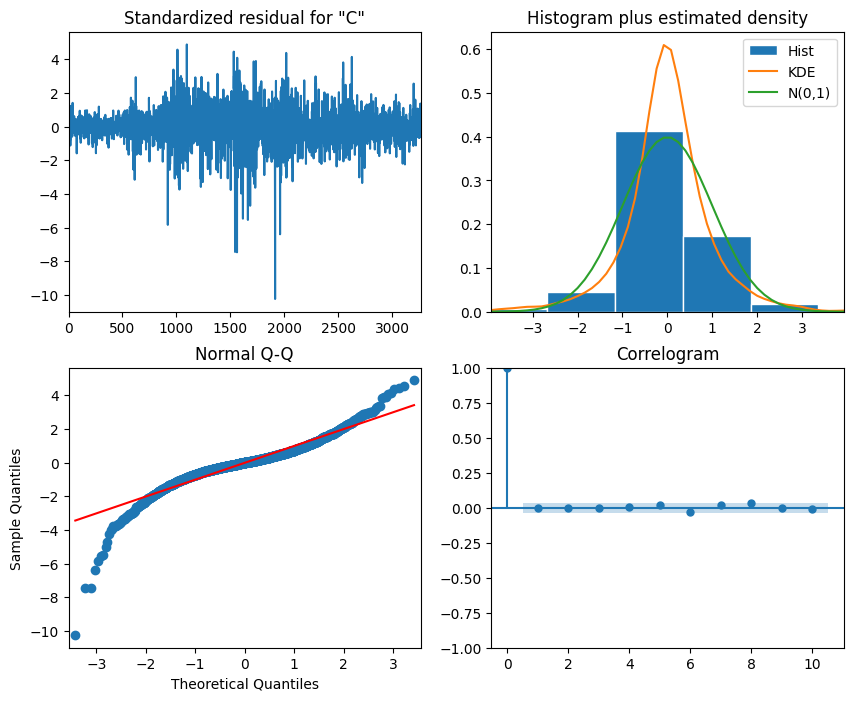

In [19]:
# Plot diagnostics
sarima_fit.plot_diagnostics(figsize=(10, 8))
plt.show()



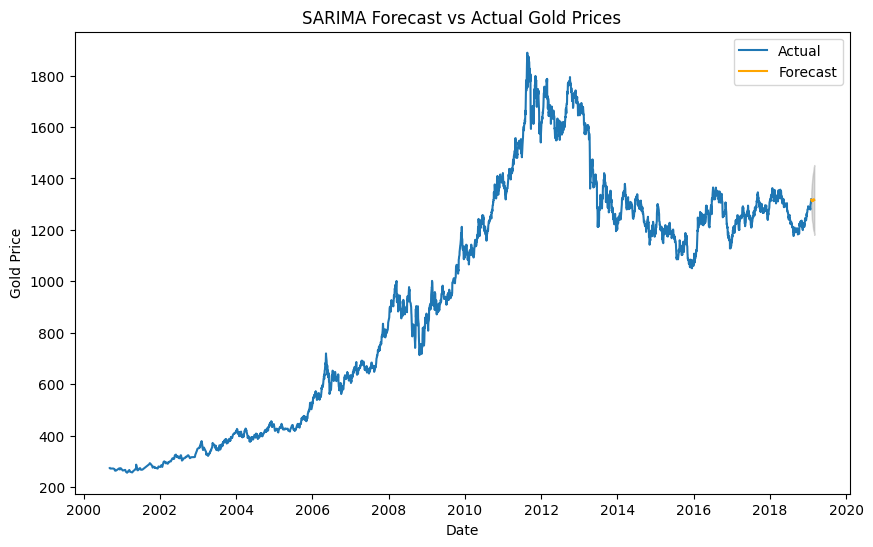

In [20]:
# Forecast next 30 days
forecast_steps = 30
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Confidence intervals for forecasts
conf_int = forecast.conf_int()
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned.index, gold_data_cleaned['Close'], label='Actual')
plt.plot(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
         forecast_values, label='Forecast', color='orange')
plt.fill_between(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast vs Actual Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()



In [21]:
# Forecast the next 30 days
forecast_steps = 30  # Adjust this based on how many days you want to forecast
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean  # Get forecasted values
forecast_conf_int = forecast.conf_int()  # Confidence intervals for forecast

# Print the forecasted values
print("Forecasted Gold Prices for the next 30 days:")
print(forecast_values)

# Print confidence intervals
print("\nConfidence Intervals for the forecast:")
print(forecast_conf_int)


Forecasted Gold Prices for the next 30 days:
3278    1316.906744
3279    1316.056488
3280    1314.684043
3281    1314.169946
3282    1313.849290
3283    1312.566272
3284    1312.076368
3285    1311.498244
3286    1312.939001
3287    1313.968703
3288    1314.658359
3289    1316.936555
3290    1317.148941
3291    1316.522612
3292    1315.358623
3293    1315.028070
3294    1314.882021
3295    1313.760018
3296    1313.417156
3297    1313.027739
3298    1314.613295
3299    1315.786087
3300    1316.617013
3301    1318.996693
3302    1319.314777
3303    1318.787609
3304    1317.716716
3305    1317.473593
3306    1317.409619
3307    1316.364676
Name: predicted_mean, dtype: float64

Confidence Intervals for the forecast:
      lower Close  upper Close
3278  1289.799948  1344.013541
3279  1277.913972  1354.199004
3280  1268.194750  1361.173335
3281  1260.738284  1367.601608
3282  1254.378297  1373.320284
3283  1247.699943  1377.432600
3284  1242.303718  1381.849018
3285  1237.206622  1385.789866

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_result = adfuller(gold_data['Close'])  # 'Close' is your target variable

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# Interpretation
if adf_result[1] > 0.05:
    print("The series is non-stationary; differencing may be needed.")
else:
    print("The series is stationary.")



ADF Statistic: -2.6202760366303566
p-value: 0.08887861341389008
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The series is non-stationary; differencing may be needed.


In [23]:
# Apply differencing
data_diff = gold_data['Close'].diff().dropna()

# Re-run ADF Test on differenced data
adf_result_diff = adfuller(data_diff)

print('ADF Statistic after Differencing:', adf_result_diff[0])
print('p-value after Differencing:', adf_result_diff[1])
print('Critical Values:', adf_result_diff[4])

# Interpretation
if adf_result_diff[1] > 0.05:
    print("The differenced series is still non-stationary.")
else:
    print("The differenced series is now stationary.")


# Re-run ADF Test on differenced data
adf_result_diff = adfuller(data_diff)

print('ADF Statistic after Differencing:', adf_result_diff[0])
print('p-value after Differencing:', adf_result_diff[1])
print('Critical Values:', adf_result_diff[4])

# Interpretation
if adf_result_diff[1] > 0.05:
    print("The differenced series is still non-stationary.")
else:
    print("The differenced series is now stationary.")


ADF Statistic after Differencing: -15.76548680444879
p-value after Differencing: 1.1778595449074235e-28
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The differenced series is now stationary.
ADF Statistic after Differencing: -15.76548680444879
p-value after Differencing: 1.1778595449074235e-28
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The differenced series is now stationary.


In [22]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Auto ARIMA to find the best SARIMA parameters
auto_model = pm.auto_arima(gold_data['Close'],
                           seasonal=True,
                           m=12,  # Assuming monthly seasonality
                           d=1,  # Already differenced
                           D=1,  # Seasonal differencing
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model found
print(auto_model.summary())

# You can then use the best parameters to build a final SARIMA model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=96.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=75346.649, Time=0.49 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=72599.869, Time=3.91 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=21.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=75348.536, Time=0.45 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=71293.146, Time=11.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=101.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=40.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=71291.171, Time=6.37 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=72598.531, Time=4.77 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=63.88 sec


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming best SARIMA model is (1, 1, 1)x(1, 1, 1, 12)
final_model = SARIMAX(gold_data['Close'],
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

# Fit the model
sarima_fit = final_model.fit(disp=False)

# Print the model summary
print(sarima_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 9846
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -34365.279
Date:                            Tue, 22 Oct 2024   AIC                          68740.558
Time:                                    10:22:35   BIC                          68776.518
Sample:                                         0   HQIC                         68752.741
                                           - 9846                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5544      0.467      1.187      0.235      -0.361       1.470
ma.L1         -0.5624      0.463   

In [25]:
# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)

# Get confidence intervals
confidence_intervals = forecast.conf_int()

# Predicted values
predicted_values = forecast.predicted_mean

# Print forecast and confidence intervals
print(predicted_values)
print(confidence_intervals)


9846    1316.742208
9847    1316.711776
9848    1317.002910
9849    1317.130728
9850    1317.207839
9851    1317.366264
9852    1318.078719
9853    1318.393913
9854    1318.740941
9855    1318.654888
9856    1318.473685
9857    1318.319459
Name: predicted_mean, dtype: float64
      lower Close  upper Close
9846  1301.087242  1332.397174
9847  1294.660732  1338.762820
9848  1290.072140  1343.933681
9849  1286.096957  1348.164500
9850  1282.562992  1351.852686
9851  1279.457539  1355.274989
9852  1277.168140  1358.989298
9853  1274.688450  1362.099375
9854  1272.409554  1365.072329
9855  1269.838978  1367.470798
9856  1267.293909  1369.653461
9857  1264.880378  1371.758539
